# Planteamiento

Tenemos una cuadricula de 12x12 en la que la que conocemos la ocupación de las columnas y de las filas, pero no la distribución de la ocupación.

El reto consiste en, dada una ocupación dada, encontrar la distribución en la matriz.

Existen restricciones. La superficie esta cubierta con termométros que hay que rellenar, y tiene que hacerse desde el bulbo hacia el final, sin dejar huecos.

Fill the thermometers with mercury, such that the numbers outside the grid indicate how many cells in each row and column are filled. Mercury always starts filling from the base (circular part) of a thermometer, towards the top.

Este es el escenario:

![puzzle 19](img/puzzle_19_small.png)

# Diferential evolution 
lo descarto, es para espacios continuos, y esto no se como mostrarlo como espacio continuo.

Quiza convirtiendo los temometros en continuos, la longitud entre unidades, y hacemos una transformación. El llenado va desde cero hasta uno con n particiones, lo que consideramos son los termometros, que se llenan.
La solución, por lo tanto, está en irlos llenando, de forma que se conformen las sumas de filas columnas.


No, lo que es continuo es el llenado de cada celda, ahi podemos poner un umbral 0.5 de activación, y eso es lo que consideramos lleno o no. nuestra transición al uno.
con una distribucion gausiana centrada en el o.5 podemos inicializarlo.

In [3]:
import numpy as np
import pandas as pd
import time
import pygad

# tablero 12x12

In [20]:
#ctes
N_FILAS = 12 # es cuadrado, asi que uso solo una
target_col = np.array([7,5,7,1,7,3,4,4,7,7,7,4])
target_fil = np.array([6,7,6,1,4,3,6,7,6,7,7,3])
tablero = np.zeros(shape =(N_FILAS,N_FILAS))
# Codificamos los termómetros
# fila, columna, mov1,mov2,....mov n.
# movimientos: u: up, d: down, l:left, r:right
# La posición del bulbo está determinada por el par fila-columna, el recorrido del termometro por los movimientos.
t1 =  np.transpose( np.array([0,0,'d','d','d']))
t2 =  np.transpose( np.array([0,1,'r','r','r','r','d','d']))
t3 =  np.transpose( np.array([0,10,'l','l','d','d'])) 
t4 =  np.transpose( np.array([0,11,'d','l','d'])) 
t5 =  np.transpose( np.array([1,7,'u','l','d'])) 
t6 =  np.transpose( np.array([1,9,'d'])) 
t7 =  np.transpose( np.array([2,3,'l','l'])) 
t8 =  np.transpose( np.array([2,4,'u','l','l','l'])) 
t9 =  np.transpose( np.array([2,11,'d','d','d','d','d','l'])) 
t10 = np.transpose( np.array([3,2,'l','d','d'])) 
t11 = np.transpose( np.array([3,3,'r','r'])) 
t12 = np.transpose( np.array([3,9,'l','l','u','l'])) 
t13 = np.transpose( np.array([4,2,'r','r','r'])) 
t14 = np.transpose( np.array([4,9,'l','l','l','u'])) 
t15 = np.transpose( np.array([5,2,'r','r'])) 
t16 = np.transpose( np.array([5,5,'r','r','r','r','d','l'])) 
t17 = np.transpose( np.array([6,6,'r'])) 
t18 = np.transpose( np.array([6,10,'u','u','u'])) 
t19 = np.transpose( np.array([7,0,'u','u','u'])) 
t20 = np.transpose( np.array([7,6,'l','u','l','l','l','l'])) 
t21 = np.transpose( np.array([8,3,'r'])) 
t22 = np.transpose( np.array([8,5,'r','r','u','r','r'])) 
t23 = np.transpose( np.array([8,11,'d'])) 
t24 = np.transpose( np.array([9,7,'l','l','d','r','r'])) 
t25 = np.transpose( np.array([9,9,'r','u','l'])) 
t26 = np.transpose( np.array([10,0,'u','u'])) 
t27 = np.transpose( np.array([10,1,'u','u','u'])) 
t28 = np.transpose( np.array([10,2,'u','u','u','r','r'])) 
t29 = np.transpose( np.array([10,4,'u','l','d'])) 
t30 = np.transpose( np.array([10,8,'u','u'])) 
t31 = np.transpose( np.array([10,9,'r']))
t32 = np.transpose( np.array([11,4,'l','l','l','l']))
t33 = np.transpose( np.array([11,6,'l']))
t34 = np.transpose( np.array([11,7,'r','r']))
t35 = np.transpose( np.array([11,11,'u']))

termometros = pd.DataFrame([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,
                  t12,t13,t14,t15,t16,t17,t18,t19,t20,
                  t21,t22,t23,t24,t25,t26,t27,t28,t29,
                  t30,t31,t32,t33,t34,t35])

## tablero de prueba pequeño 4x4
Genero un tablero de prueba a ver si realmente es capaz de solucionarlo.

ocupación:
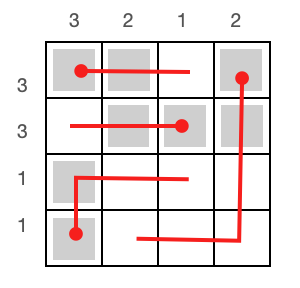



In [15]:
N_FILAS = 4 # es cuadrado, asi que uso solo una
target_col = np.array([3,2,1,2])
target_fil = np.array([3,3,1,1])
tablero = np.zeros(shape =(N_FILAS,N_FILAS))
t0 =  np.transpose( np.array([0,0,'r','r']))
t1 =  np.transpose( np.array([0,3,'d','d','d','l','l']))
t2 =  np.transpose( np.array([1,2,'l','l'])) 
t3 =  np.transpose( np.array([3,0,'u','r','r'])) 
termometros = pd.DataFrame([t0,t1,t2,t3])

# Differential Evolution

sigo [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html) tutorial


He cargado el ga, la poblacion inicial, etc... no hay convergencia ni evolución, tengo que mirarlo en mas detalle a ver donde esta el error.

In [18]:
# Como entrada acepta un vector 1D, asi que hemos de linealizar y luego tablerizar.
lineal = np.zeros(144)
def lin_to_tab(lin):
    return np.reshape( lin, [N_FILAS,N_FILAS])

def tab_to_lin(tab):
    return np.reshape(tab, [N_FILAS*N_FILAS])

In [19]:
def init_population( n_ind = 10):
    init_population = np.empty(shape = (n_ind,N_FILAS*N_FILAS))
    for ind in range(n_ind):
        init_population[ind,:]= np.random.randint(0,2,N_FILAS*N_FILAS)
    return init_population

In [49]:
def fitness_func(sol):
    tab = np.rint(lin_to_tab(sol))
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    error = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    return 1000-error    

In [21]:
def evaluar_termometros(termometros,sol):
    error = 0
    solTab= lin_to_tab(sol)
    for t in range(len(termometros)):
        temp = termometros.iloc[t,:].to_list()
        tRoute = list(filter(None,temp))
        error += evaluar_integridad_termometro(tRoute,solTab)
    return error
    
def evaluar_integridad_termometro(ruta, tablero):
    f = int(ruta[0])
    c = int(ruta[1])
    termometroRoto = False;
    c_ant_filled = False
    if tablero[f,c]!=0:
        c_ant_filled = True
    for step in ruta[2:]:
        #movemos el paso
        if step == 'l':
            c -= 1
        elif step == 'r':
            c += 1
        elif step == 'u':
            f = f-1
        elif step == 'd':
            f += 1      
        #evaluamos
        if tablero[f,c] == 0:
            c_ant_filled = False
        elif tablero[f,c] != 0 and c_ant_filled == False:
            termometroRoto = True
        if termometroRoto == True:
            break
    if termometroRoto == True:
        return 1
    else:
        return 0

In [153]:
def fitness2_func(sol):
    tab = np.rint(lin_to_tab(sol))
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    #error 1 nos da el error de número de celdas ocupadas. cuanto menor mejor
    #error1 = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    error1 = sum((ocu_col - target_col))+ sum((ocu_fil - target_fil))
    #error2 = evaluar_termometros(termometros,sol)
    return 1000-error1#-error2   

In [10]:
# de : https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
                trial = np.where(cross_points, mutant, pop[j])
                trial_denorm = min_b + trial * diff
                f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
            if f < fitness[best_idx]:
                best_idx = j
            best = trial_denorm
    yield best, fitness[best_idx]

In [9]:
np.random.randint(0,2,144)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

## implementación de scipy

In [11]:
from scipy.optimize import differential_evolution

In [58]:
bounds = [[0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1],
          [0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1]]

In [136]:
result = differential_evolution(
    fitness2_func,
     bounds,
    popsize = 10,
    #strategy = 'randtobest1exp',
    maxiter = 10)
result

     fun: 988.0
 message: 'Optimization terminated successfully.'
    nfev: 337
     nit: 1
 success: True
       x: array([0.88102432, 0.71055356, 0.6631627 , 0.2367585 , 0.26933391,
       0.88266949, 0.98708821, 0.81595169, 0.89246066, 0.65569881,
       0.80719784, 0.56670528, 0.57388311, 0.95973757, 0.92827997,
       0.65967486])

In [128]:
a= np.rint(np.array(result.x))
lin_to_tab(a)
a

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [129]:
a= np.rint(np.array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.]))
fitness2_func(a)

994.0

In [130]:
lin_to_tab(a)
a

array([0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.])

## Mi implementacion

In [143]:
bounds = [[0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1],
          [0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1],[0, 1], [0, 1]]

In [179]:
# de : https://pablormier.github.io/2017/09/05/a-tutorial-on-differential-evolution-with-python/
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=100):
    dimensions = len(bounds)
    pop = np.rint(np.random.rand(popsize, dimensions))
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
            pop[j] = trial
            if f < fitness[best_idx]:
                best_idx = j
            best = trial_denorm
    return best, fitness[best_idx]

In [183]:
min_b, max_b = np.asarray(bounds).T
max_b

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [180]:
result= de(fitness2_func,bounds)
print ('fitness: ', result[1])

fitness:  988.0


In [170]:
lin_to_tab(np.rint(result[0]))

array([[1., 0., 0., 0.],
       [1., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 1., 1., 1.]])